In [20]:
# Importing the neccessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

In [21]:
df= pd.read_csv("AirPassengers.csv")

In [22]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [23]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [24]:
df.shape

(144, 2)

In [25]:
df.columns

Index(['Month', '#Passengers'], dtype='object')

In [26]:
df.rename(columns = {'#Passengers' : 'Passengers'},
                                     inplace = True)

In [27]:
df.columns

Index(['Month', 'Passengers'], dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [29]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [30]:
df.duplicated().sum()

0

In [31]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

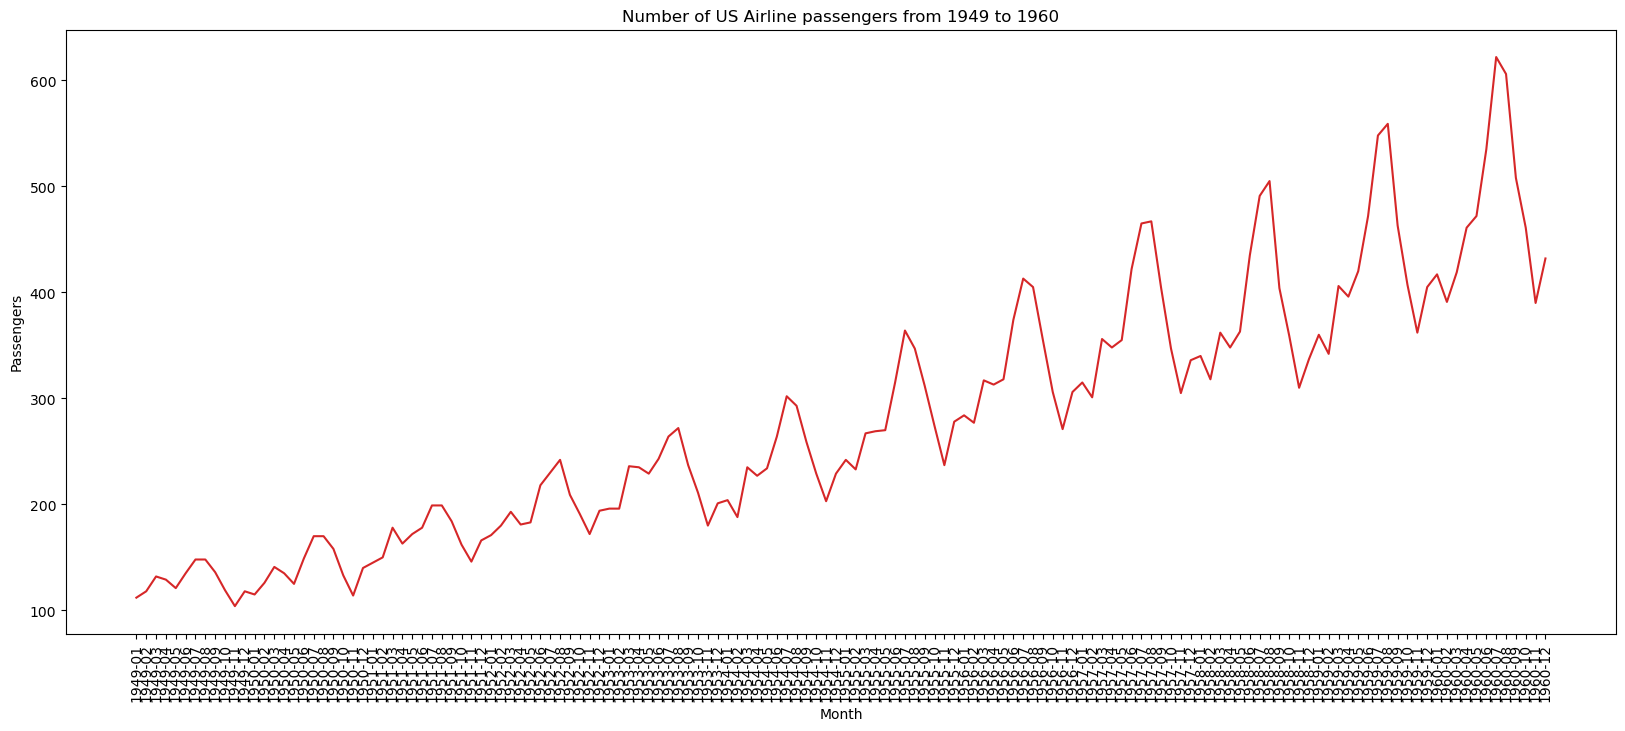

In [35]:
def plot_df(df, x, y, title="", xlabel='Month', ylabel='Passengers', dpi=100):
    plt.figure(figsize=(20,8), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(rotation = 90)
    plt.show()
plot_df(df, x=df['Month'], y=df['Passengers'], 
        title='Number of US Airline passengers from 1949 to 1960')

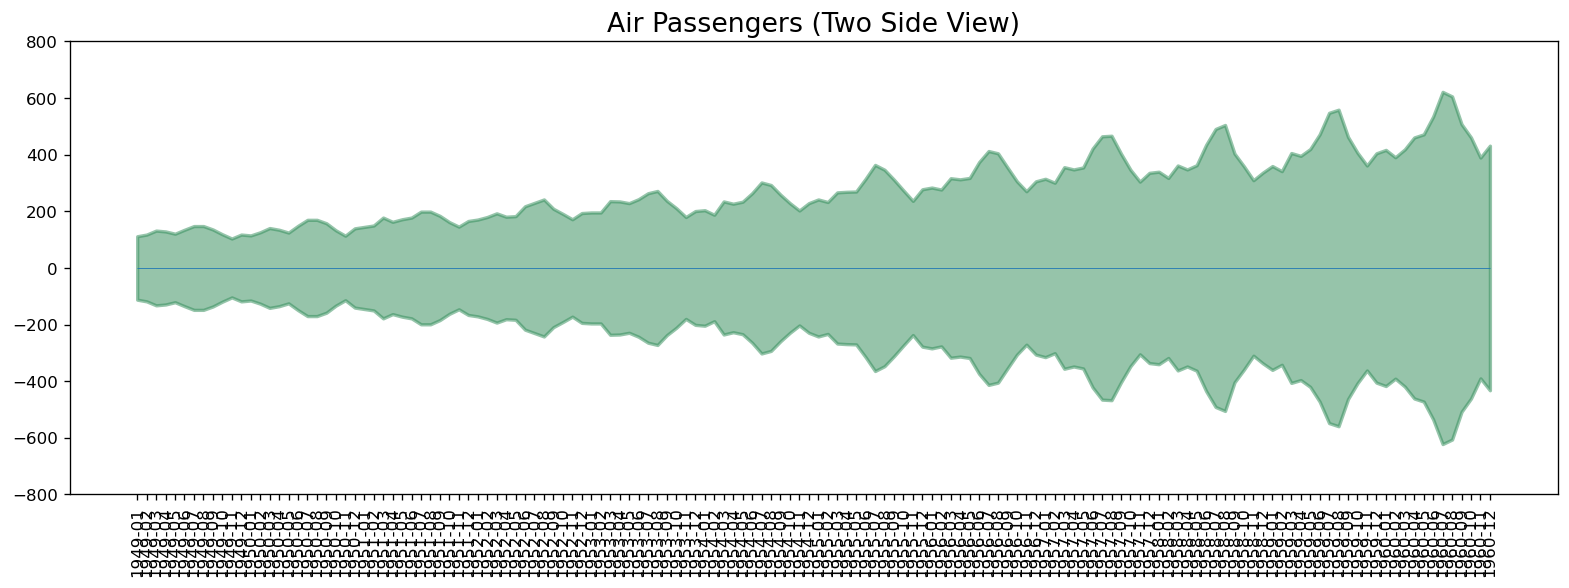

In [36]:
x = df['Month'].values
y1 = df['Passengers'].values
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, 
                 color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(airlines_data['Month']), 
           xmax=np.max(airlines_data['Month']), linewidth=.5)
plt.xticks(rotation = 90)
plt.show()

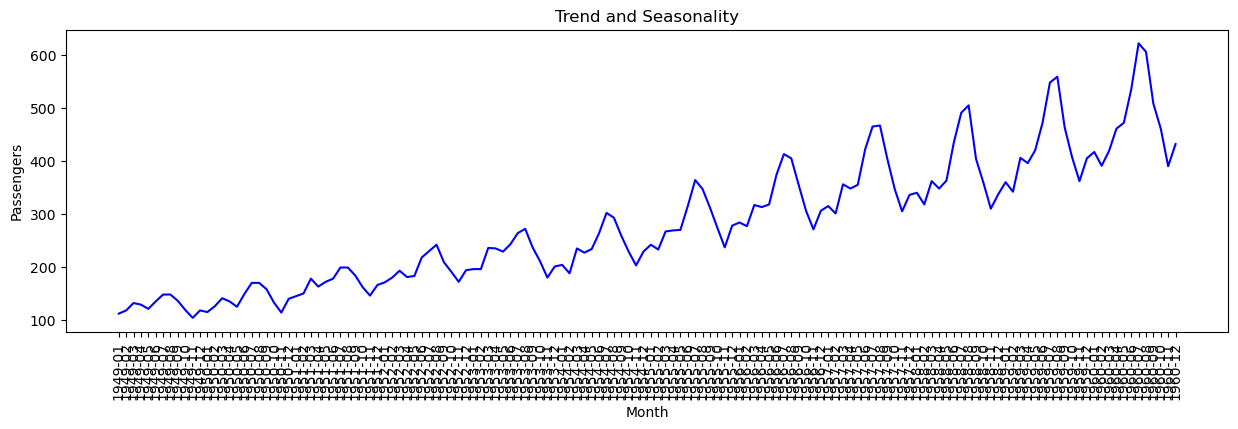

In [37]:
def plot_df(df, x, y, title="", xlabel='Month', ylabel='Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(rotation = 90)
    plt.show()
plot_df(df, x=airlines_data['Month'], y=df['Passengers'], title='Trend and Seasonality')

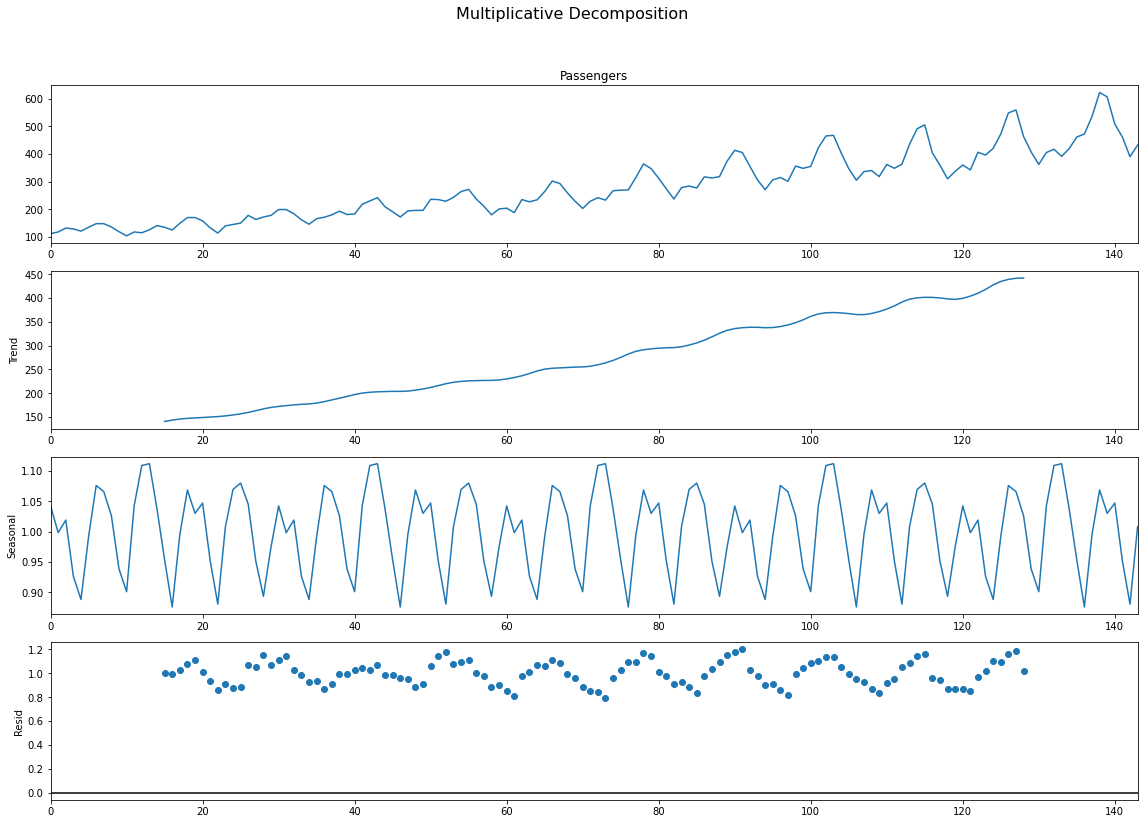

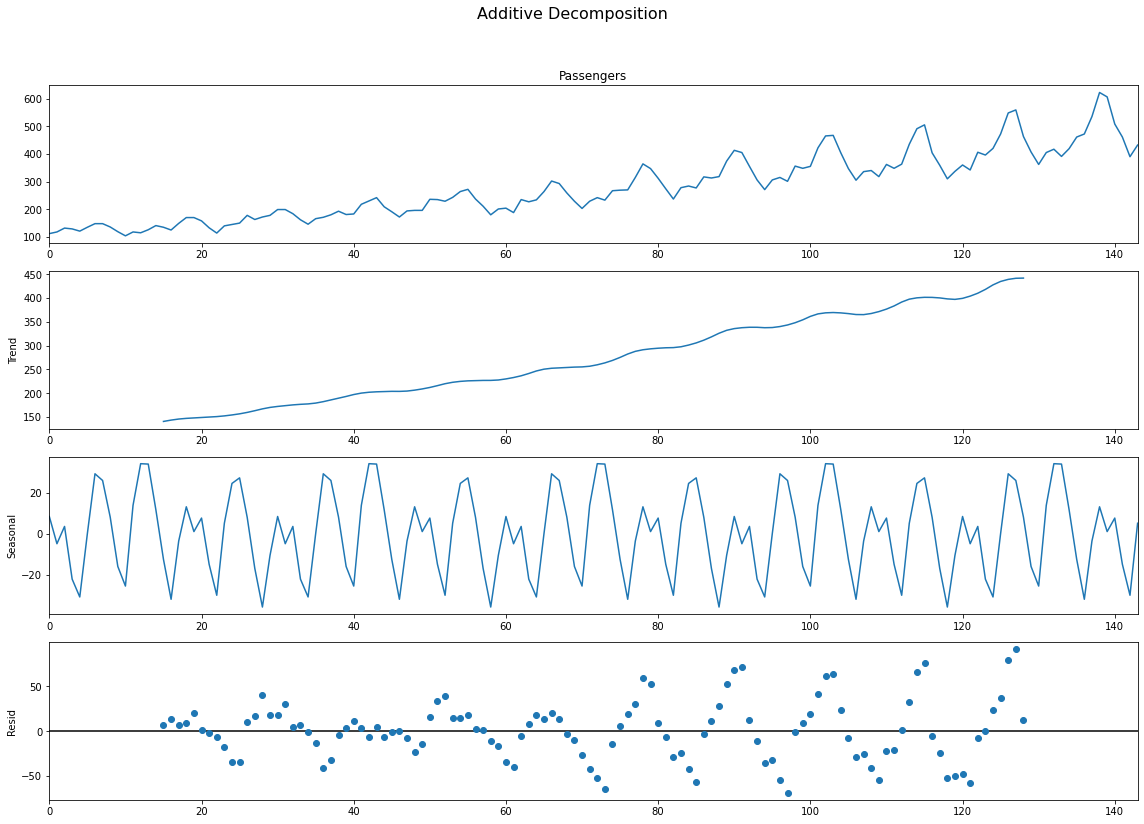

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['Passengers'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Passengers'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

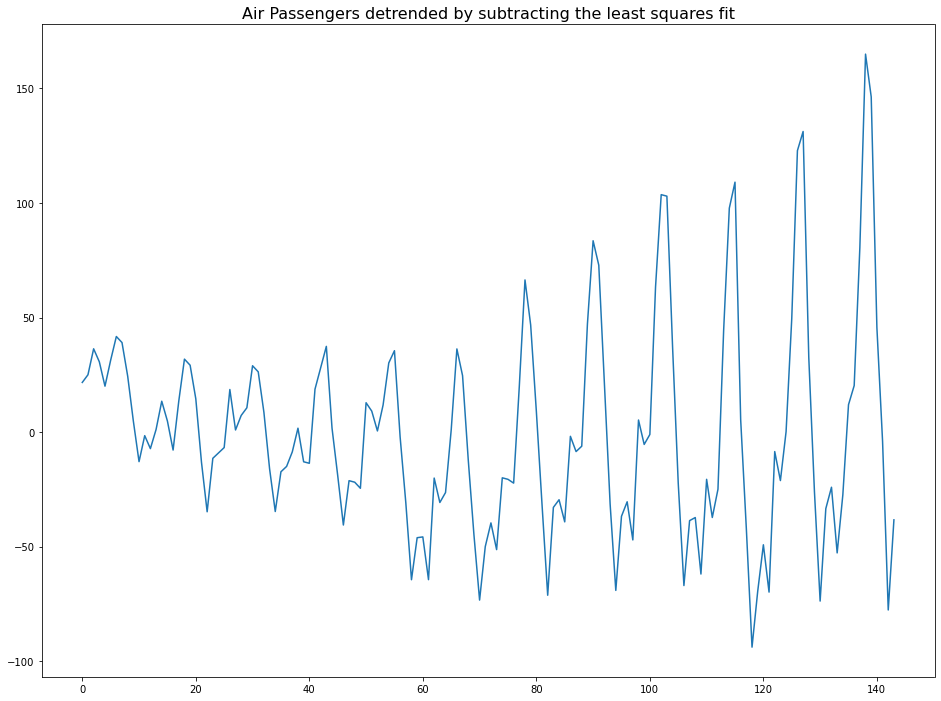

In [41]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrended = signal.detrend(df['Passengers'].values)
plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the least squares fit', fontsize=16)
plt.show()

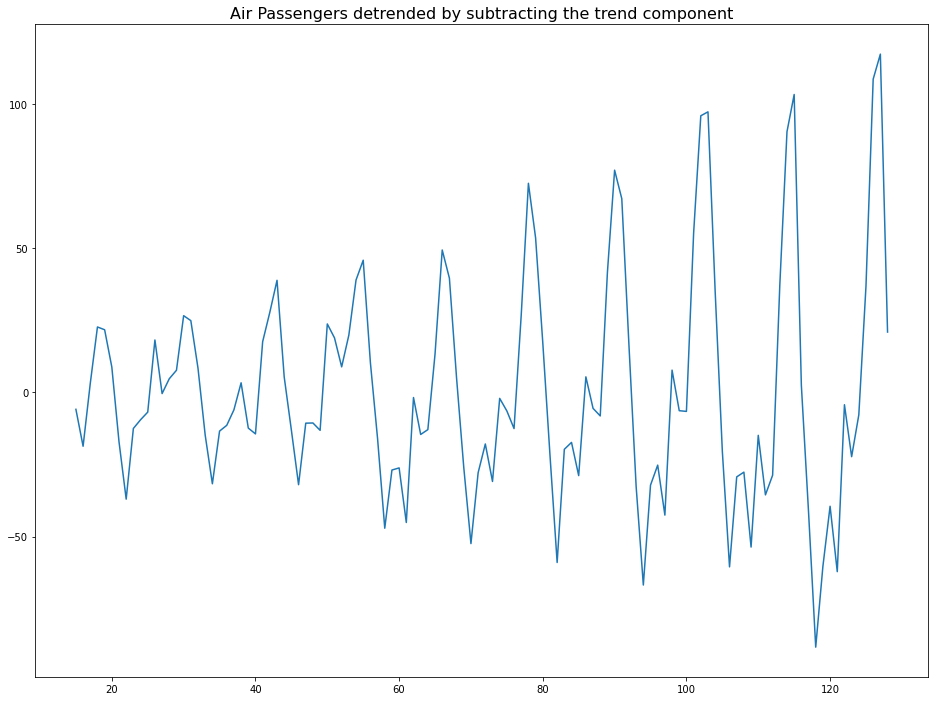

In [42]:
# Using statmodels: Subtracting the Trend Component
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df['Passengers'], model='multiplicative', period=30)
detrended = df['Passengers'].values - result_mul.trend
plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the trend component', fontsize=16)
plt.show()

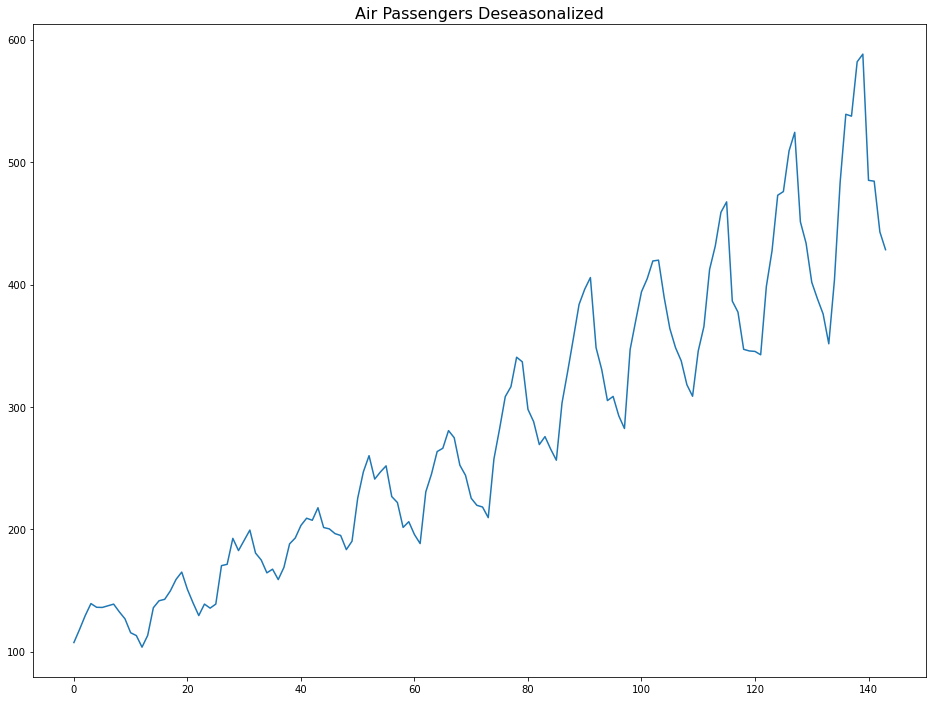

In [43]:
# Subtracting the Trend Component
# Time Series Decomposition
result_mul = seasonal_decompose(df['Passengers'], 
                                model='multiplicative', period=30)
# Deseasonalize
deseasonalized = df['Passengers'].values / result_mul.seasonal
# Plot
plt.plot(deseasonalized)
plt.title('Air Passengers Deseasonalized', fontsize=16)
plt.plot()
plt.show()

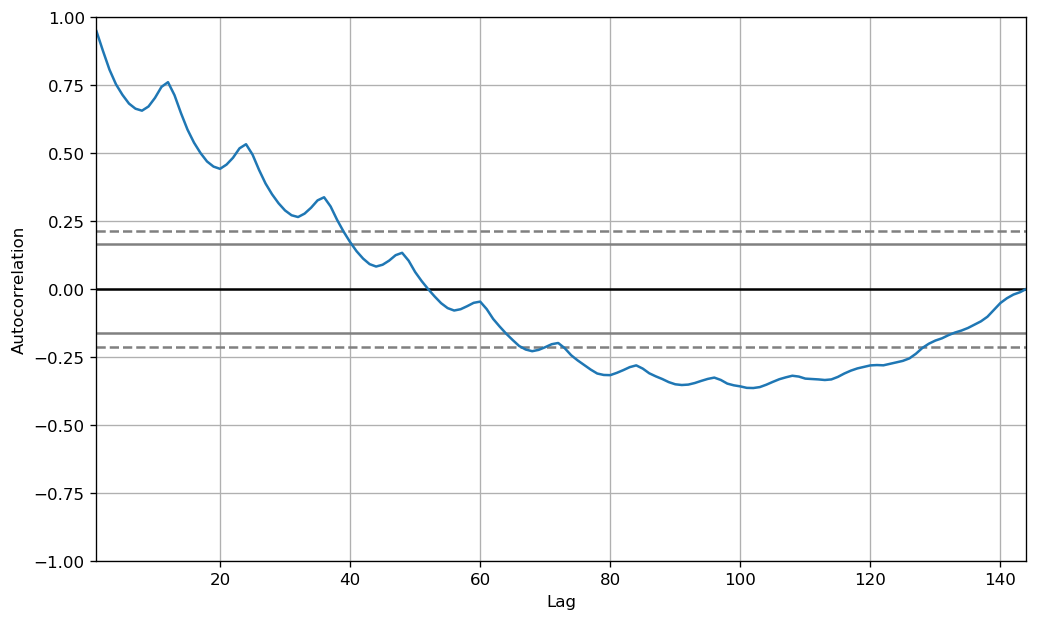

In [44]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot
# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(df['Passengers'].tolist())
plt.show()

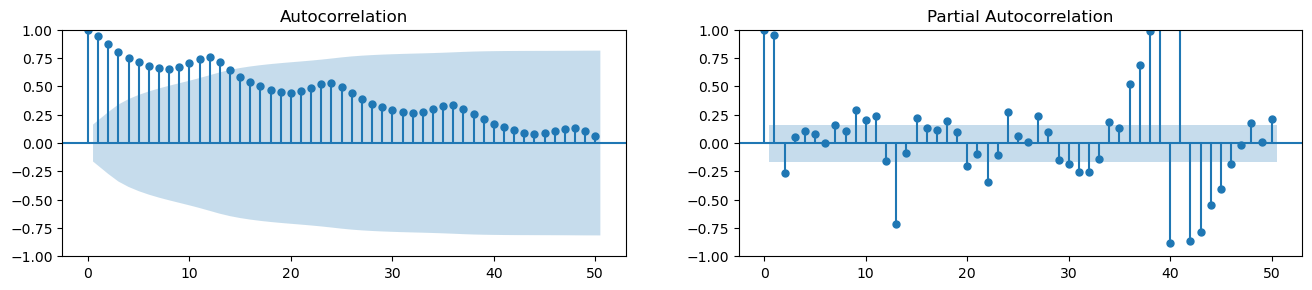

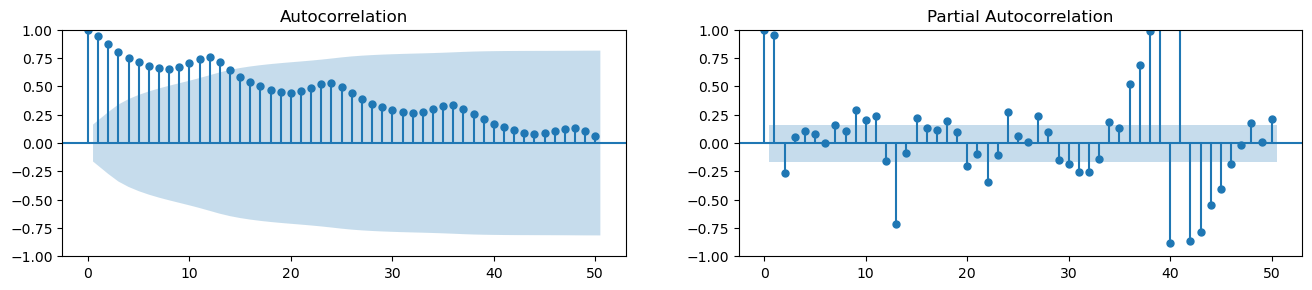

In [45]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df['Passengers'].tolist(), lags=50, ax=axes[0])
plot_pacf(df['Passengers'].tolist(), lags=50, ax=axes[1])

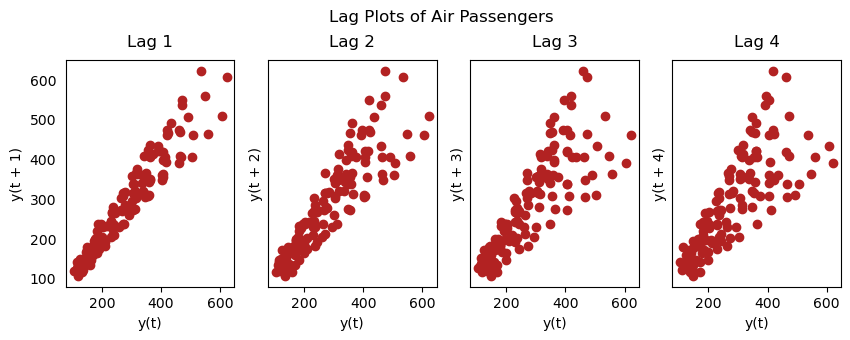

In [46]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df['Passengers'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Air Passengers', y=1.05)    
plt.show()

In [48]:
from statsmodels.tsa.stattools import grangercausalitytests
data = pd.read_csv('dataset.txt')
data['date'] = pd.to_datetime(data['date'])
data['month'] = data.date.dt.month
grangercausalitytests(data[['value', 'month']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=54.7797 , p=0.0000  , df_denom=200, df_num=1
ssr based chi2 test:   chi2=55.6014 , p=0.0000  , df=1
likelihood ratio test: chi2=49.1426 , p=0.0000  , df=1
parameter F test:         F=54.7797 , p=0.0000  , df_denom=200, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=162.6989, p=0.0000  , df_denom=197, df_num=2
ssr based chi2 test:   chi2=333.6567, p=0.0000  , df=2
likelihood ratio test: chi2=196.9956, p=0.0000  , df=2
parameter F test:         F=162.6989, p=0.0000  , df_denom=197, df_num=2


{1: ({'ssr_ftest': (54.77967483557362, 3.6614258713530505e-12, 200.0, 1),
   'ssr_chi2test': (55.60136995810722, 8.876175235021416e-14, 1),
   'lrtest': (49.142602330049954, 2.3801430060455094e-12, 1),
   'params_ftest': (54.77967483557373, 3.661425871352892e-12, 200.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (162.6989179987324, 1.9133235086856426e-42, 197.0, 2),
   'ssr_chi2test': (333.65666432227357, 3.5267600881278635e-73, 2),
   'lrtest': (196.99559277182198, 1.6709003499115789e-43, 2),
   'params_ftest': (162.6989179987325, 1.913323508685587e-42, 197.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}